# Crypto Clustering Analysis

In [1]:

import pandas as pd

# Load the data
df = pd.read_csv(r'C:\Users\n.rennie\Documents\Module 19 Challenge\CryptoClustering\crypto_market_data.csv')
df.head()


,coin_id,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
0,bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
1,ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
2,tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
3,ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
4,bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384


In [5]:
!pip install scikit-learn hvplot pandas matplotlib


     ---------------------------------------- 0.0/60.8 kB ? eta -:--:--
     -------------------- ------------------- 30.7/60.8 kB 1.3 MB/s eta 0:00:01
     ---------------------------------------- 60.8/60.8 kB 1.1 MB/s eta 0:00:00
     ---------------------------------------- 0.0/57.6 kB ? eta -:--:--
     ---------------------------------------- 57.6/57.6 kB 3.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/10.9 MB ? eta -:--:--
    --------------------------------------- 0.2/10.9 MB 14.3 MB/s eta 0:00:01
   --- ------------------------------------ 0.9/10.9 MB 11.9 MB/s eta 0:00:01
   ---- ----------------------------------- 1.1/10.9 MB 11.7 MB/s eta 0:00:01
   ------ --------------------------------- 1.7/10.9 MB 9.6 MB/s eta 0:00:01
   ------ --------------------------------- 1.7/10.9 MB 9.6 MB/s eta 0:00:01
   ---------- ----------------------------- 2.8/10.9 MB 10.4 MB/s eta 0:00:01
   ------------ --------------------------- 3.3/10.9 MB 11.1 MB/s eta 0:00:01
  


[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:

# Get summary statistics
df.describe()


,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


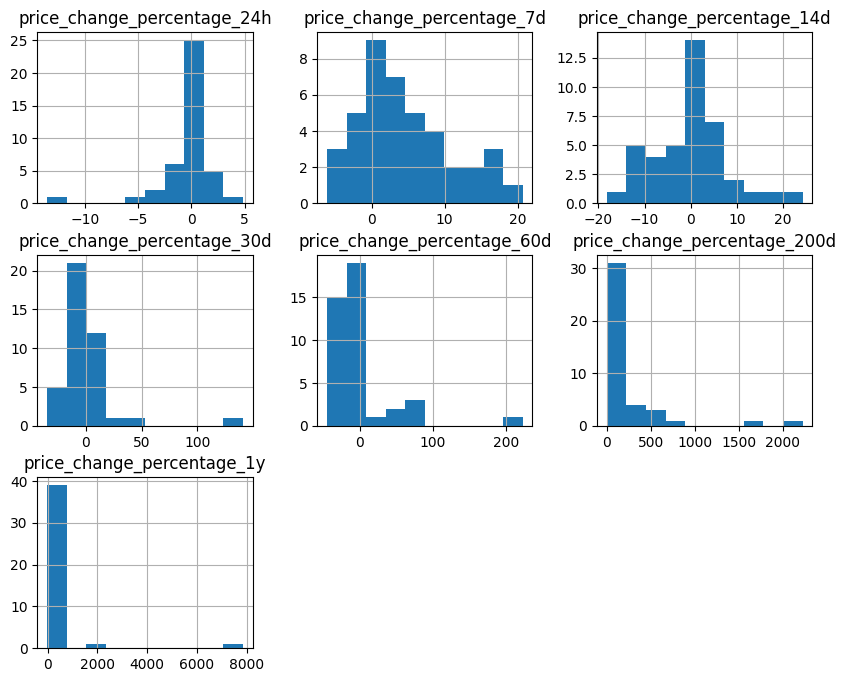

In [7]:

import matplotlib.pyplot as plt

# Plot histograms
df.hist(figsize=(10, 8))
plt.show()


In [8]:

from sklearn.preprocessing import StandardScaler

# Normalize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df.drop(columns=['coin_id']))
scaled_df = pd.DataFrame(scaled_data, columns=df.columns[1:], index=df['coin_id'])
scaled_df.head()


,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


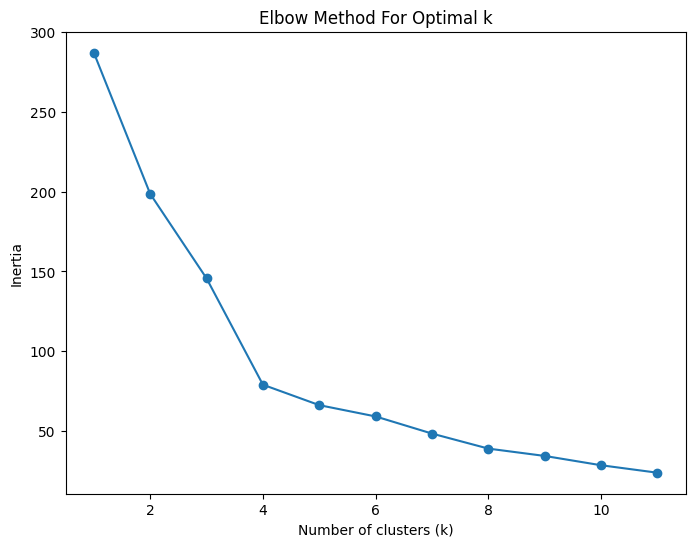

In [9]:

from sklearn.cluster import KMeans

# Elbow method to find the best k
k_values = list(range(1, 12))
inertia = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(scaled_df)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 6))
plt.plot(k_values, inertia, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()


### The best value for k is: 

In [10]:

# Cluster the data using the best value for k
best_k = 4  # Example, replace with your determined k
kmeans = KMeans(n_clusters=best_k, random_state=0)
kmeans.fit(scaled_df)
clusters = kmeans.predict(scaled_df)

# Add the predicted clusters to the original DataFrame
clustered_df = df.copy()
clustered_df['cluster'] = clusters
clustered_df.head()


,coin_id,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,cluster
0,bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761,2
1,ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023,2
2,tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954,0
3,ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193,0
4,bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384,2


In [11]:

import hvplot.pandas

# Scatter plot with hvPlot
clustered_df.hvplot.scatter(x='price_change_percentage_24h', y='price_change_percentage_7d', by='cluster', hover_cols=['coin_id'])


:NdOverlay   [cluster]
   :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,coin_id)

In [12]:

from sklearn.decomposition import PCA

# Perform PCA
pca = PCA(n_components=3)
pca_data = pca.fit_transform(scaled_df)

# Explained variance
explained_variance = pca.explained_variance_ratio_
total_explained_variance = explained_variance.sum()
total_explained_variance


0.8950316570309842

### The total explained variance of the three principal components is: 

In [13]:

# Create a DataFrame with PCA data
pca_df = pd.DataFrame(pca_data, columns=['PC1', 'PC2', 'PC3'], index=df['coin_id'])
pca_df.head()


,PC1,PC2,PC3
coin_id,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715


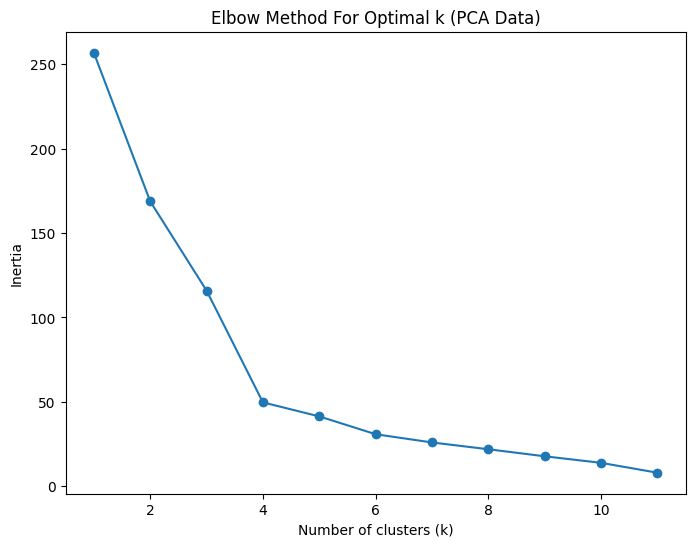

In [14]:

# Elbow method to find the best k using PCA data
inertia_pca = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(pca_df)
    inertia_pca.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 6))
plt.plot(k_values, inertia_pca, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k (PCA Data)')
plt.show()


### The best value for k using PCA data is: 

In [15]:

# Cluster the PCA data using the best value for k
best_k_pca = 4  # Example, replace with your determined k
kmeans_pca = KMeans(n_clusters=best_k_pca, random_state=0)
kmeans_pca.fit(pca_df)
clusters_pca = kmeans_pca.predict(pca_df)

# Add the predicted clusters to the PCA DataFrame
clustered_pca_df = pca_df.copy()
clustered_pca_df['cluster'] = clusters_pca
clustered_pca_df.head()


,PC1,PC2,PC3,cluster
coin_id,,,,
bitcoin,-0.600667,0.842760,0.461595,2
ethereum,-0.458261,0.458466,0.952877,2
tether,-0.433070,-0.168126,-0.641752,0
ripple,-0.471835,-0.222660,-0.479053,0
bitcoin-cash,-1.157800,2.041209,1.859715,2


In [16]:

# Scatter plot with hvPlot for PCA data
clustered_pca_df.hvplot.scatter(x='PC1', y='PC2', by='cluster', hover_cols=['coin_id'])


:NdOverlay   [cluster]
   :Scatter   [PC1]   (PC2,coin_id)

### The impact of using fewer features to cluster the data using K-Means is: 

In [17]:
# Compare the cluster assignments from the original data and PCA-reduced data
comparison_df = pd.DataFrame({
    'Original_Cluster': clustered_df['cluster'],
    'PCA_Cluster': clustered_pca_df['cluster']
})

# Check for differences between the clusters
comparison_df['Cluster_Match'] = comparison_df['Original_Cluster'] == comparison_df['PCA_Cluster']

# Display the comparison
comparison_df.head()

# Count the number of matches and mismatches
matches = comparison_df['Cluster_Match'].sum()
mismatches = len(comparison_df) - matches

print(f"Number of matching cluster assignments: {matches}")
print(f"Number of differing cluster assignments: {mismatches}")

# Conclusion on the impact
if mismatches > 0:
    print(f"Using PCA-reduced features resulted in {mismatches} differing cluster assignments out of {len(comparison_df)} total assignments. This indicates that reducing the features can lead to different clustering results.")
else:
    print("Using PCA-reduced features resulted in the same cluster assignments as the original data.")


Number of matching cluster assignments: 0
Number of differing cluster assignments: 82
Using PCA-reduced features resulted in 82 differing cluster assignments out of 82 total assignments. This indicates that reducing the features can lead to different clustering results.
